In [11]:
from __future__ import print_function
import logging
import torch
from torchvision import transforms
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import os
import platform
import time
import sys
sys.path.append('..')
from utils.Network import Network
from utils.Analyser import Analyser
from utils.io import save_network, load_network, save, load
from utils.WaveDataset import create_datasets, transformVar, normalize
from utils.training import train_epoch, validate, test
from utils.arg_extract import seed_everything
from utils.io import imshow

In [18]:
# normalize = transforms.Normalize(mean=[0.5047], std=[0.1176])

transformVar = {"Test": transforms.Compose([
    transforms.Resize(128),    #Already 184 x 184
    transforms.CenterCrop(128),
    transforms.ToTensor(),
#     normalize
]),
    "Train": transforms.Compose([
    transforms.Resize(128),  # Already 184 x 184
    transforms.CenterCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
#     normalize
    ])
}

In [19]:
seed_everything(1234)
data_dir = '../'
num_channels=1
num_workers=1

test_dataset, val_dataset, train_dataset = create_datasets(
     data_dir+"Video_Data/", transformVar, test_fraction=0.01, validation_fraction=0.01)
all_data = {"Training data": train_dataset, "Validation data": val_dataset, "Testing data": test_dataset}
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=num_workers)

In [20]:
bb = next(iter(train_dataloader))


In [21]:
img

tensor([[[0.5059, 0.5059, 0.5059,  ..., 0.5059, 0.5059, 0.5059],
         [0.5059, 0.5059, 0.5059,  ..., 0.5059, 0.5059, 0.5059],
         [0.5059, 0.5059, 0.5059,  ..., 0.5059, 0.5059, 0.5059],
         ...,
         [0.5059, 0.5059, 0.5059,  ..., 0.5059, 0.5059, 0.5059],
         [0.5059, 0.5059, 0.5059,  ..., 0.5059, 0.5059, 0.5059],
         [0.5059, 0.5059, 0.5059,  ..., 0.5059, 0.5059, 0.5059]]])

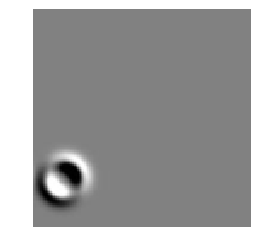

In [22]:
img=bb[10,10:11,:,:]
imshow(img)

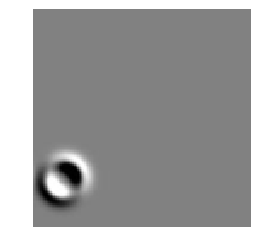

In [23]:
imshow(img, normalize=normalize)

# With normalization

In [2]:
normalize = {'mean':0.5047, 'std':0.1176}

transformVar = {"Test": transforms.Compose([
    transforms.Resize(128),    #Already 184 x 184
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[normalize['mean']], std=[normalize['std']])
]),
    "Train": transforms.Compose([
    transforms.Resize(128),  # Already 184 x 184
    transforms.CenterCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[normalize['mean']], std=[normalize['std']])
    ])
}

In [3]:
# from utils.WaveDataset import transformVar

In [4]:
seed_everything(1234)

data_dir = '../'
num_channels=1
num_workers=1

test_dataset, val_dataset, train_dataset = create_datasets(
     data_dir+"Video_Data/", transformVar, test_fraction=0.01, validation_fraction=0.01)
all_data = {"Training data": train_dataset, "Validation data": val_dataset, "Testing data": test_dataset}
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True, num_workers=num_workers)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=num_workers)

In [5]:
bb2 = next(iter(train_dataloader))
# from utils.io import imshow

In [7]:
img=bb2[10,10:11,:,:]
img.size()

torch.Size([1, 128, 128])

In [8]:
img.min()

tensor(-4.2917)

In [9]:
img.max()

tensor(4.2117)

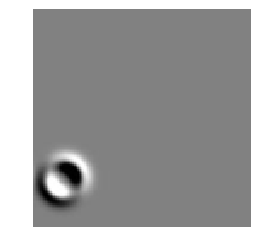

In [12]:
imshow(img)

In [148]:
def normalize_image(image, normalize):
    mean = normalize['mean']
    std = normalize['std']
    image = std * image + mean
    return image

In [171]:
from utils.format import normalize_image
img = bb2['image'][10,0:3,:,:]
img_norm = normalize_image(img, normalize)

In [172]:
img.size()

torch.Size([3, 128, 128])

In [173]:
print(img.mean())
print(img.min())

tensor(-0.0242)
tensor(-4.2917)


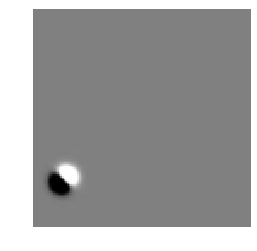

In [175]:
imshow(img, normalize=normalize)

In [151]:
img[2:3,:,:].mean()

tensor(0.5058)

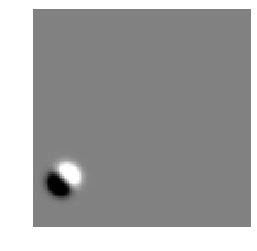

In [152]:
imshow(img[2:3,:,:])

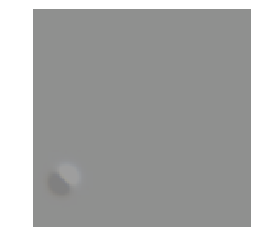

In [153]:
imshow(img_norm)

In [27]:
bb1_pred = bb['image'][0,10:11,:,:]
bb1_targ = bb['image'][0,11:12,:,:]
print(bb1_pred.mean())
print(bb1_pred.min())
print(bb1_pred.max())

tensor(0.5057)
tensor(0.)
tensor(1.)


In [28]:
bb2_pred = bb2['image'][0,10:11,:,:]
bb2_targ = bb2['image'][0,11:12,:,:]
print(bb2_pred.mean())
print(bb2_pred.min())
print(bb2_pred.max())

tensor(0.0087)
tensor(-4.2917)
tensor(4.2117)


In [33]:
mean=0.5047
std=0.1176
bb3 = bb2_pred *std + mean
print(bb3.mean())
print(bb3.min())
print(bb3.max())

tensor(0.5057)
tensor(0.)
tensor(1.)


In [50]:
from skimage import measure #supports video also

In [177]:
from utils.Scorekeeper import Scorekeeper
sc = Scorekeeper('tt', 1)

In [178]:
measure.compare_ssim(sc.prepro(bb1_pred), sc.prepro(bb1_targ), multichannel=False, gaussian_weights=True,)

0.9835907855732646

In [179]:
measure.compare_ssim(sc.prepro(bb2_pred, normalize), sc.prepro(bb2_targ, normalize), multichannel=False, gaussian_weights=True)

0.9835907855087116